Warning message:
“Removed 2 rows containing missing values (geom_bar).”

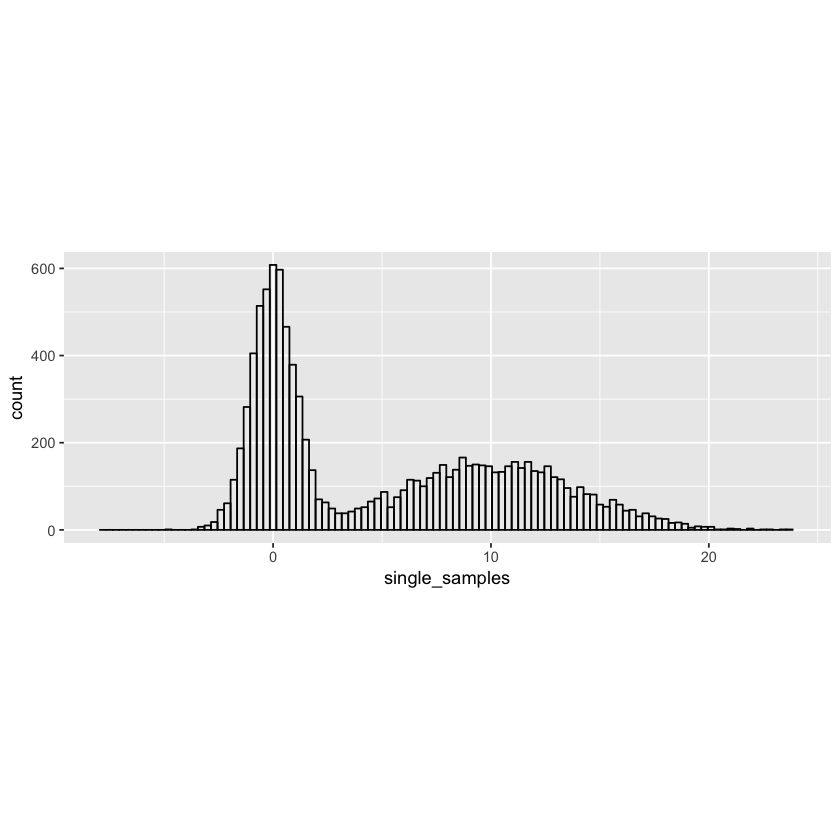

In [87]:
library(ggplot2)

# plot the underlying distribution

samplesize <- 1 #size of each sample
timestosample <- 10000 #number of datasets to sample 

bimodal <- function(size){
  ifelse(sample(0:1,size,replace = TRUE),rnorm(size,0,1),rnorm(size,10,4))
}


single_samples <- vector(mode="numeric", length=timestosample)
for (i in 1:timestosample){
    a <- bimodal(samplesize)
    single_samples[i] <- mean(a)
}
df <- data.frame(single_samples=c(single_samples))


ggplot(data=df) +  geom_histogram(aes(x=single_samples), binwidth=.3,color="black", fill="white",alpha=0.1) + xlim(-8,24) + coord_fixed(ratio=.02)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

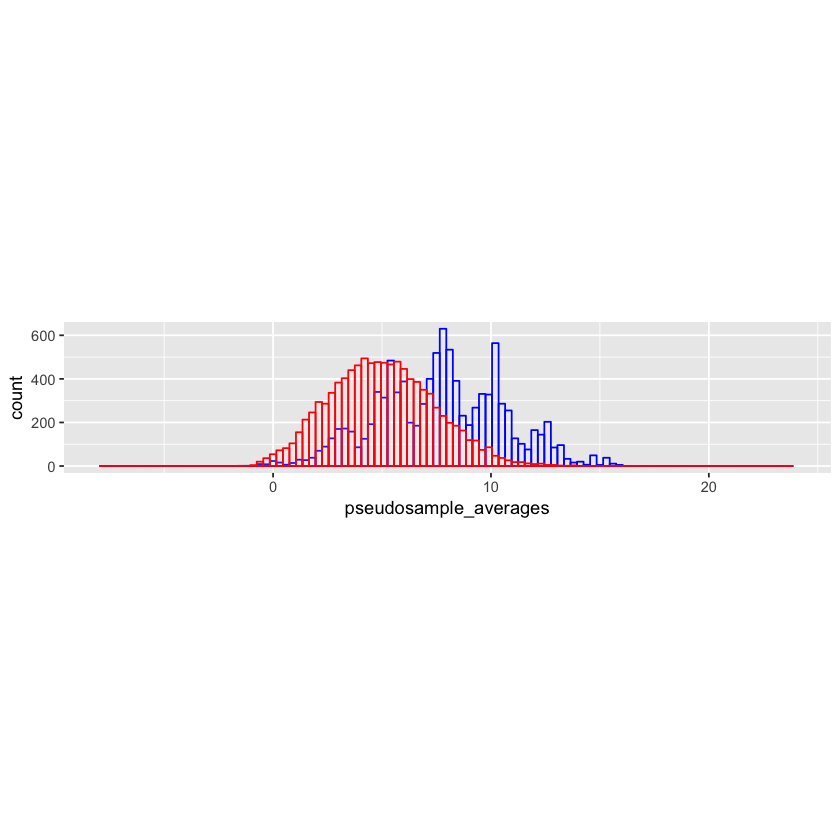

In [93]:
samplesize <- 6 #size of each sample
timestosample <- 10000 #number of datasets to sample 

bimodal <- function(size){
  ifelse(sample(0:1,size,replace = TRUE),rnorm(size,0,1),rnorm(size,10,4))
}

#sampling directly from the underlying distribution
sampleaverages <- vector(mode="numeric", length=timestosample)
for (i in 1:timestosample){
    a <- bimodal(samplesize)
    sampleaverages[i] <- mean(a)
}
df <- data.frame(sample_averages=c(sampleaverages))

#creating pseudosamples from a single sample set taken from the distribution
a <- bimodal(samplesize)
pseudosampleaverages <- vector(mode="numeric", length=timestosample)
for (i in 1:timestosample){
    pseudosample_a <- sample(a, samplesize, replace=T)
    pseudosampleaverages[i] <- mean(pseudosample_a)
}

pseudo_df <- data.frame(pseudosample_averages=c(pseudosampleaverages))
df$pseudosample_averages <- pseudosampleaverages

ggplot(data=df) +  geom_histogram(aes(x=pseudosample_averages), binwidth=.3,color="blue", fill="white",alpha=0.1) + 
geom_histogram(aes(x=sample_averages), binwidth=.3,color="red", fill="white",alpha=0.1) + xlim(-8,24) + coord_fixed(ratio=.01)